# S13 T02: Base de datos MySQL
### Descripción
Crear base de datos con MySQL.

___
## Nivel 1
### - Ejercicio 1
Crea una base de datos relacionales sencilla utilizando MySQL( https://www.mysql.com/ ) y conéctala a Python


In [1]:
# Import Libraries
import mysql.connector
from mysql.connector import connect, Error
from getpass import getpass
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Se genera una conexion con la base de datos generada en el la tarea 1 del sprint anterior y se conecta con MySQL 

In [2]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="",
)


print(mydb)

## Nivel 2

### - Ejercicio 2
Muestra que puedes cargar algunas consultas sencillas a un Pandas Dataframe .

In [3]:
#select the database and create a conection
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="",
  database="s13t02"
)

In [4]:
#show the databases available in mysql
cursor = mydb.cursor()
cursor.execute("SHOW DATABASES")

for dbs in cursor:
  print(dbs)

('information_schema',)
('mydb',)
('mysql',)
('performance_schema',)
('s13t01',)
('s13t01_sql',)
('s13t02',)
('sakila',)
('sys',)
('world',)


In [10]:
#show the databases available in mysql
cursor = mydb.cursor()
cursor.execute("SHOW TABLES")

for dbs in cursor:
  print(dbs)

('client',)
('establishment',)
('list_product',)
('product_type',)
('transaction',)
('worker',)


Ahora traemos algunas de las tablas de la base de datos y la convertimos a pandas dataframe.

In [6]:
# CUSTOMER dataframe
sql = 'SELECT * FROM client'

clients_df = pd.read_sql(sql, mydb);
clients_df

,Client_ID,Client_name,Client_lastname,Client_address,Client_phone,Client_email
0,1,Yovanna,Valencia,Barcelona,955111222,yv@gmail.com
1,2,Benjamin,Guiraud,Tarragona,955222333,bg@gmail.com
2,3,Yulianna,Barba,Madrid,966333444,yb@gmail.com
3,4,Ezequiel,Aguirre,Castelldefels,966444555,ea@gmail.com


In [7]:
# CUSTOMER dataframe
sql = 'SELECT * FROM establishment'

establishment_df = pd.read_sql(sql, mydb);
establishment_df

,Establishment_ID,Estblishment_name,Establishment_address,Establishment_phone,Establishment_email
0,1,Nike,"Pg. de Gràcia, 17, 08007 Barcelona",932714503,nike@nike.com
1,2,Nike L’Illa,"Avinguda Diagonal, 557, 08029 Barcelona",932714503,nikel@nike.com
2,3,Nike Store - Les Rambles,"La Rambla, 120, 08002 Barcelona",933015548,niker@nike.com
3,4,adidas Brand Center Barcelona,"Pg. de Gràcia, 3, 08007 Barcelona",918368867,adidas@adidas.com
4,5,adidas Store Barcelona,"Avinguda Diagonal, 208, 08018 Barcelona",918368868,adidas2@adidas.com


In [11]:
# CUSTOMER dataframe
sql = 'SELECT * FROM list_product'

list_product_df = pd.read_sql(sql, mydb);
list_product_df

,Product_ID,Type_ID,Product_name,Product_quantity,Product_unit_cost,Product_description
0,1,1,ZAPATILLA BUSENITZ PRO,10,90,Core Black / Footwear White / Gold Metallic
1,2,2,ZAPATILLA ADIDAS 4D FWD_PULSE,10,160,Core Black / Magic Grey / Blue Rush
2,3,3,ZAPATILLA DURAMO SL 2.0,10,60,Shadow Navy / Halo Silver / Legend Ink
3,4,1,Nike Air Force 1 '07 LV8,10,120,Blanco/Dark Sulfur/Opti Yellow/Negro
4,5,2,Nike Winflo 8,10,100,Negro/Dark Smoke Grey/Blanco
5,6,3,Nike Legend Essential 2,10,60,Negro/Plata metalizado/Blanco


In [9]:
# CUSTOMER dataframe
sql = 'SELECT * FROM transaction'

transaction_df = pd.read_sql(sql, mydb);
transaction_df

,Transaction_ID,Product_ID,Worker_ID,Client_ID,Establishment_ID,Transaction_date
0,1,1,1,1,1,2022-05-05
1,2,2,1,1,2,2022-06-06
2,3,3,2,2,3,2022-04-04
3,4,4,3,3,4,2022-03-03
4,5,5,4,4,4,2022-02-02
5,6,6,4,3,2,2022-02-04


## Nivel 3
### - Ejercicio 3
Genera algún gráfico que resuma los datos.
___
La base de datos creada no contiene muchas transacciones, pero se ha realizado un grafico que observa las transacciones realizadas por los clientes:

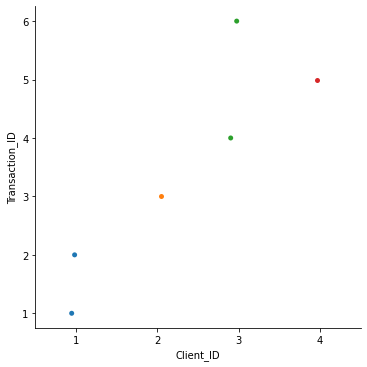

In [27]:
sns.catplot(x=transaction_df['Client_ID'], y= transaction_df['Transaction_ID'],data=transaction_df)

En el siguiente grafico se pueden observar los precios de los productos de la lista:

<AxesSubplot:xlabel='Product_ID', ylabel='Product_unit_cost'>

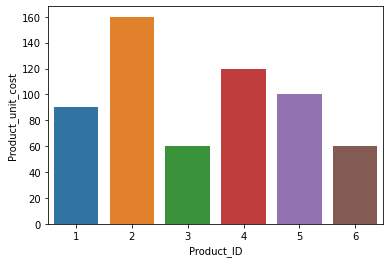

In [23]:
sns.barplot(x=list_product_df['Product_ID'], y= list_product_df['Product_unit_cost'],data=list_product_df)

Nota: Con una base de datos de mayor volumen se podrian realizar analisis visuales de mayor extension.